# ORIE 4580/5580/5581 Assignment 3

#### Students: K. Bond (klb298)

### Github link: [example Github link](https://github.com/kimbond0071/ORIE5580Homeworks.git)
https://github.com/kimbond0071/ORIE5580Homeworks

^ I put this because the other link wasn't working in my pdf

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [2]:
# Functions to visualize LCG sequence on clock (see demo notebook)
# Function to generate pseudorandom sequence using LCG
# Setting default parameters to glibc specifications (without truncation)

def plot_clock_face(m,fig,annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0*np.pi*i/m
        plt.plot(np.sin(theta),np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi/2-theta,1.05),xycoords='polar')


def plot_clock_path(m,x,fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0*np.pi*(x[0]*(m+1)-1)/m
    plt.plot(np.sin(theta_0),np.cos(theta_0),'gs')

    # Plot the path of the LCG sequence
    for i in range(len(x)-1):
        theta_start = 2.0*np.pi*(x[i]*(m+1)-1)/m
        theta_end = 2.0*np.pi*(x[i+1]*(m+1)-1)/m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x)>0 or abs(del_y)>0:
            plt.arrow(x_start,y_start,del_x,del_y,
                      length_includes_head = True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n,m = 2**31-1,a = 1103515245,c = 12345, seed = 1):
    output = np.zeros(n)

    x = seed
    for i in range(n):
        output[i] = (x+1.0)/(m+1.0)
        x = (a*x+c)%m

    return output

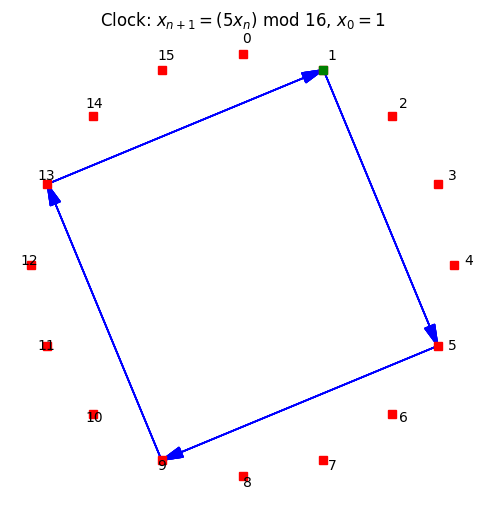

In [4]:
# Ans

# 1) x_{n+1} = (5 x_n) mod 16, seed x0 = 1
m1, a1, c1, x0 = 16, 5, 0, 1
x_seq = LCG(n=m1+1, m=m1, a=a1, c=c1, seed=x0)  # n=m+1 is plenty to see the full cycle

fig = plt.figure(figsize=(6,6))
plot_clock_face(m1, fig, annotate=True)         # set annotate=False if you want fewer labels
plot_clock_path(m1, x_seq, fig, color='b')
plt.title(r"Clock: $x_{n+1}=(5x_n)\ \mathrm{mod}\ 16$, $x_0=1$")
plt.axis('equal'); plt.axis('off'); plt.show()


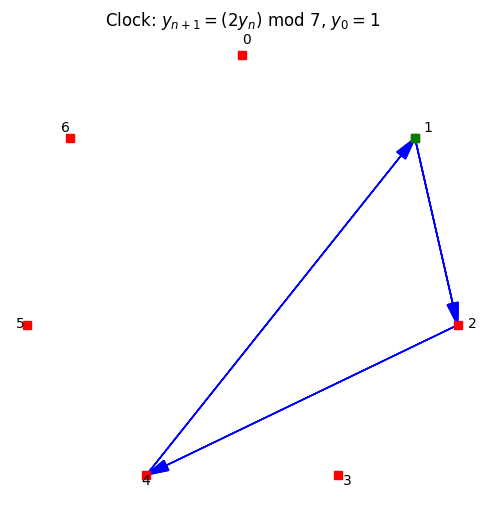

In [5]:
# 2) y_{n+1} = (2 y_n) mod 7, seed y0 = 1
m2, a2, c2, y0 = 7, 2, 0, 1
y_seq = LCG(n=m2+1, m=m2, a=a2, c=c2, seed=y0)

fig = plt.figure(figsize=(6,6))
plot_clock_face(m2, fig, annotate=True)
plot_clock_path(m2, y_seq, fig, color='b')
plt.title(r"Clock: $y_{n+1}=(2y_n)\ \mathrm{mod}\ 7$, $y_0=1$")
plt.axis('equal'); plt.axis('off'); plt.show()

#code based on class

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

Period of x: 4
Period of y: 3
Length of combined z sequence (until (x,y) returns to seed): 12
z states: [2, 7, 13, 14, 3, 9, 10, 15, 5, 6, 11, 1]


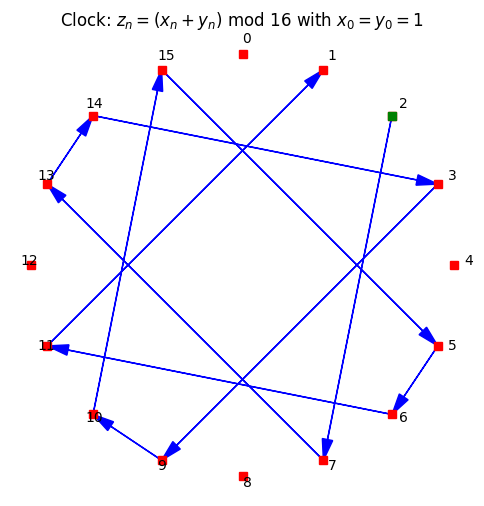

In [6]:
# ---------------------------
# Extra tiny helpers for part (b)
# ---------------------------

def lcg_states_until_repeat(a, m, seed):
    """
    Return the raw integer states of x_{n+1} = (a x_n) mod m starting at 'seed',
    stopping right before the state repeats (one full cycle).
    """
    x = seed
    seq = [x]
    seen = {x}
    while True:
        x = (a * x) % m
        if x in seen:
            break
        seen.add(x)
        seq.append(x)
    return seq  # length is the period of this cycle

def lcm(a, b):  # in case you want the LCM explicitly
    return a * b // gcd(a, b)

# Base LCGs
m1, a1, x0 = 16, 5, 1     # x_{n+1} = (5 x_n) mod 16
m2, a2, y0 = 7,  2, 1     # y_{n+1} = (2 y_n) mod 7

# Get the cycles (raw integer states)
x_cycle = lcg_states_until_repeat(a1, m1, x0)   # e.g., [1,5,9,13]
y_cycle = lcg_states_until_repeat(a2, m2, y0)   # e.g., [1,2,4]

# Build the combined sequence z_n until the (x,y) pair returns to (x0,y0)
z_states = []
x, y = x0, y0
while True:
    z_states.append((x + y) % m1)       # z_n = (x_n + y_n) mod 16
    # advance both generators one step
    x = (a1 * x) % m1
    y = (a2 * y) % m2
    if x == x0 and y == y0:
        break

# (Optional) print the periods
print("Period of x:", len(x_cycle))
print("Period of y:", len(y_cycle))
print("Length of combined z sequence (until (x,y) returns to seed):", len(z_states))
print("z states:", z_states)

# Convert z integer states to the demo's scaled values u = (z+1)/(m1+1)
z_scaled = [(z + 1.0) / (m1 + 1.0) for z in z_states]

# Plot the clock for z_n using the class visualization style
fig = plt.figure(figsize=(6,6))
plot_clock_face(m1, fig, annotate=True)   # labels around the circle
plot_clock_path(m1, z_scaled, fig, color='b')
plt.title(r"Clock: $z_n = (x_n + y_n)\ \mathrm{mod}\ 16$ with $x_0=y_0=1$")
plt.axis('equal'); plt.axis('off'); plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

We have three generators:

- $x_{n+1} = (5x_n) \bmod 16$, with $x_0 = 1$  
- $y_{n+1} = (2y_n) \bmod 7$, with $y_0 = 1$  
- $z_n = (x_n + y_n) \bmod 16$  

For the period of X, he sequence is:  
$$x_n : 1 \to 5 \to 9 \to 13 \to 1 \to \dots$$  
Thus, the cycle length is **4**.

---

For the period of Y the sequence is:  
$$y_n : 1 \to 2 \to 4 \to 1 \to \dots$$  
Thus, the cycle length is **3**.

---


The combined generator repeats only when both $(x_n, y_n)$ return to $(1,1)$.  
This occurs every
$$\mathrm{lcm}(4,3) = 12$$
steps. Hence, the period of $z_n$ is **12**.

---

### Final Results
- Period of $x_n$: **4**  
- Period of $y_n$: **3**  
- Period of $z_n$: **12**


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.


We use the generalized inverse (pseudoinverse)
$$F^{-1}(y)=\inf\{x \mid F(x)\ge y\}, \qquad y\in[0,1].$$

For the given CDF
$$
F(x)=
\begin{cases}
0 & \text{for } x<0,\\[2pt]
x & \text{for } 0\le x<\tfrac{1}{2},\\[2pt]
\tfrac{1}{2} & \text{for } \tfrac{1}{2}\le x<1,\\[2pt]
1 & \text{for } x\ge 1,
\end{cases}
$$
note:
- On $[0,\tfrac{1}{2})$, $F$ rises linearly from $0$ to $\tfrac{1}{2}$.
- On $[\tfrac{1}{2},1)$, $F$ is flat at $\tfrac{1}{2}$ (no jump at $x=\tfrac{1}{2}$).
- At $x=1$, $F$ jumps from $\tfrac{1}{2}$ to $1$ (a point mass $1/2$ at $x=1$).

---

Here $F(x)=x$ on $[0,\tfrac{1}{2})$, so the first $x$ with $F(x)\ge y$ is $x=y$.  
Thus,
$$F^{-1}(y)=y, \qquad 0<y<\tfrac{1}{2}.$$

We want $\inf\{x\mid F(x)\ge \tfrac{1}{2}\}$.  
For $x<\tfrac{1}{2}$ we have $F(x)<\tfrac{1}{2}$, while $F(\tfrac{1}{2})=\tfrac{1}{2}$.  
Hence,
$$F^{-1}\!\left(\tfrac{1}{2}\right)=\tfrac{1}{2}.$$

$F(x)$ stays at $\tfrac{1}{2}$ for all $x<1$ and jumps to $1$ at $x=1$.  
So the **first** $x$ with $F(x)\ge y$ (any $y>\tfrac{1}{2}$) is $x=1$.  
Thus,
$$F^{-1}(y)=1, \qquad \tfrac{1}{2}<y\le 1.$$


By the definition, $\{x\mid F(x)\ge 0\}=(-\infty,\infty)$, so $\inf$ is $-\infty$.  
In simulation practice we take $U\sim\text{Unif}(0,1)$ (excluding $0$), so this case has probability $0$ and can be ignored. (If desired, one may define $F^{-1}(0)=0$ by convention for this distribution’s support.)



### Final pseudoinverse
$$
F^{-1}(y)=
\begin{cases}
y, & 0<y<\tfrac{1}{2},\\[6pt]
\tfrac{1}{2}, & y=\tfrac{1}{2},\\[6pt]
1, & \tfrac{1}{2}<y\le 1,\\[6pt]
-\infty, & y=0\ \text{(by the formal definition; measure-zero in simulation).}
\end{cases}
$$


### Sampling rule (Inversion method)
If $U\sim\text{Unif}(0,1)$, then

$$
X=F^{-1}(U)=$
\begin{cases}
U, & U<\tfrac{1}{2},\\[4pt]
1, & U\ge \tfrac{1}{2}.
\end{cases}
$$
This shows the distribution is a mixture:
- with probability $1/2$: a continuous part uniform on $[0,\tfrac{1}{2})$,
- with probability $1/2$: a point mass at $x=1$.

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

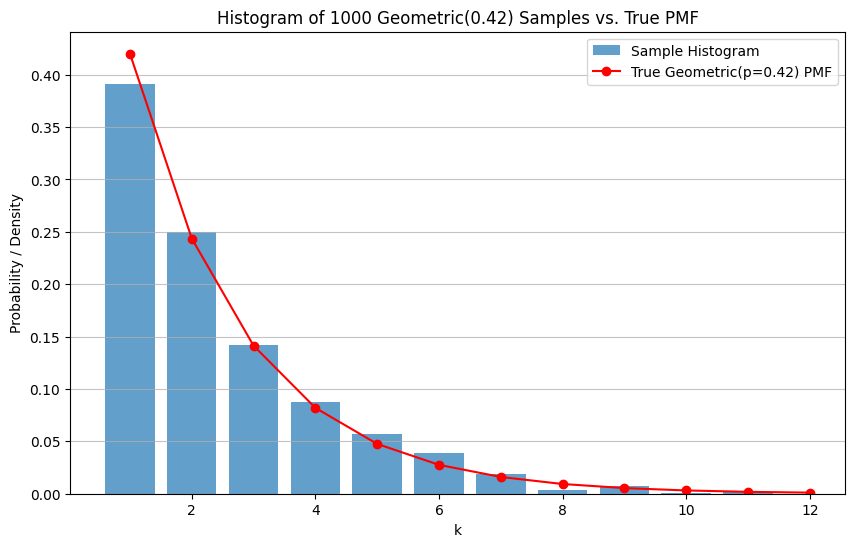

In [7]:
# Ans.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Probability parameter for Geometric distribution
p = 0.42

# Number of samples to generate
num_samples = 1000

# Inversion algorithm for Geometric(p)
# Using the formula k = floor(log(U) / log(1-p)) + 1
U = np.random.rand(num_samples) # Generate uniform random numbers in [0, 1)
geometric_samples = np.floor(np.log(U) / np.log(1 - p)) + 1

# Plotting the histogram of the generated samples
plt.figure(figsize=(10, 6))
plt.hist(geometric_samples, bins=np.arange(min(geometric_samples), max(geometric_samples) + 1.5) - 0.5, rwidth=0.8, density=True, alpha=0.7, label='Sample Histogram')

# Plotting the true PMF for comparison
k_values = np.arange(1, int(max(geometric_samples)) + 2)
pmf_values = stats.geom.pmf(k_values, p)
plt.plot(k_values, pmf_values, 'ro-', label=f'True Geometric(p={p}) PMF')

plt.xlabel('k')
plt.ylabel('Probability / Density')
plt.title(f'Histogram of {num_samples} Geometric({p}) Samples vs. True PMF')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

#First draft code generated with Gemini

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.


We are given
$$
f(x) =
\begin{cases}
e^{x-2}, & 0 \leq x \leq 2, \\
e^{-x}, & x > 2, \\
0, & \text{otherwise.}
\end{cases}
$$


For $0 \leq x \leq 2$:
$$
F(x) = \int_0^x e^{t-2}\,dt = e^{-2}\,(e^x - 1).
$$

For $x > 2$:  
Note that $F(2) = e^{-2}(e^2 - 1) = 1 - e^{-2}$. Then
$$
F(x) = F(2) + \int_2^x e^{-t}\,dt = (1 - e^{-2}) + (e^{-2} - e^{-x}) = 1 - e^{-x}.
$$

Thus,
$$
F(x) =
\begin{cases}
0, & x < 0, \\
e^{-2}\,(e^x - 1), & 0 \leq x \leq 2, \\
1 - e^{-x}, & x > 2.
\end{cases}
$$

Define the “switch” probability
$$
\alpha = F(2) = 1 - e^{-2}.
$$


Let $U \sim \text{Unif}(0,1)$. We set $X = F^{-1}(U)$.

- If $0 \leq U < \alpha$, we are in the first branch:
$$
U = e^{-2}(e^x - 1) \quad \Rightarrow \quad e^x = 1 + e^2 U \quad \Rightarrow \quad
x = \ln\!\bigl(1 + e^2 U\bigr).
$$

- If $\alpha \leq U < 1$, we are in the second branch:
$$
U = 1 - e^{-x} \quad \Rightarrow \quad e^{-x} = 1 - U \quad \Rightarrow \quad
x = -\ln(1 - U).
$$

Therefore, the inversion sampler is
$$
X =
\begin{cases}
\ln\!\bigl(1 + e^2 U\bigr), & U < 1 - e^{-2}, \\[6pt]
-\ln(1 - U), & U \geq 1 - e^{-2}.
\end{cases}
$$

---


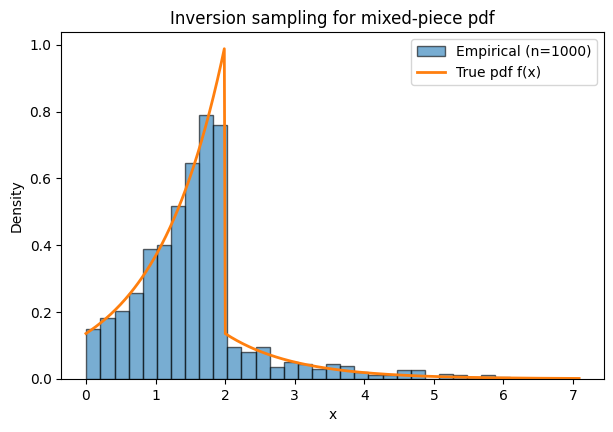

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
n = 1000
alpha = 1.0 - np.exp(-2.0)

rng = np.random.default_rng(2025)
U = rng.random(n)

# Inversion sampler
X = np.where(U < alpha,
             np.log(1.0 + np.exp(2.0) * U),
             -np.log(1.0 - U))

# Define true pdf
def f_pdf(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask1 = (0 <= x) & (x <= 2)
    mask2 = x > 2
    out[mask1] = np.exp(x[mask1] - 2.0)
    out[mask2] = np.exp(-x[mask2])
    return out

# Plot histogram + pdf
x_grid = np.linspace(0, max(6, X.max()+1), 500)
pdf_vals = f_pdf(x_grid)

plt.figure(figsize=(7,4.5))
plt.hist(X, bins=30, density=True, edgecolor='black', alpha=0.6, label='Empirical (n=1000)')
plt.plot(x_grid, pdf_vals, linewidth=2, label='True pdf f(x)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Inversion sampling for mixed-piece pdf')
plt.legend()
plt.show()

#first draft of code written by chatgpt

<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.

We are given
$$
f(x) =
\begin{cases}
\frac{5x^4+4x^3+3x^2+1}{4}, & 0 \leq x \leq 1, \\
0, & \text{otherwise.}
\end{cases}
$$

We’ll use **Uniform(0,1)** as the proposal:
$$
g(x) = \mathbf{1}_{[0,1]}(x).
$$

Since $f$ is increasing on $[0,1]$ (its derivative is
$$
f'(x) = \tfrac{1}{4}(20x^3 + 12x^2 + 6x) \geq 0),
$$
the envelope constant is
$$
M = \sup_{0 \leq x \leq 1} \frac{f(x)}{g(x)}
   = \max_{0 \leq x \leq 1} f(x)
   = f(1)
   = \frac{5+4+3+1}{4}
   = \tfrac{13}{4}.
$$

Hence the acceptance probability is
$$
\frac{1}{M} = \frac{4}{13} \approx 0.3077.
$$


#### Acceptance–Rejection Algorithm

1. Repeat until acceptance:
   - Draw $X^\ast \sim \text{Unif}(0,1)$ (proposal $g$).
   - Draw $U \sim \text{Unif}(0,1)$ (independent).
   - Compute
     $$
     f(X^\ast) = \frac{5(X^\ast)^4 + 4(X^\ast)^3 + 3(X^\ast)^2 + 1}{4}.
     $$
   - Accept $X = X^\ast$ if

     $$
     U \leq \frac{f(X^\ast)}{M}
     $$
     otherwise reject and repeat.

This procedure generates $X$ with density $f(x)$.



In [9]:
import numpy as np

def f_target(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1) / 4.0  # valid for x in [0,1]

def sample_X_AR(n, rng=None):
    """
    Acceptance–Rejection sampler for f on [0,1] using Uniform(0,1) proposal.
    Expected acceptance rate = 4/13.
    """
    if rng is None:
        rng = np.random.default_rng()
    M = 13.0 / 4.0
    out = np.empty(n)
    i = 0
    while i < n:
        x_star = rng.random()          # proposal g ~ Unif(0,1)
        u = rng.random()               # acceptance uniform
        if u <= f_target(x_star) / M:
            out[i] = x_star
            i += 1
    return out

<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.

From part (a), the acceptance probability is
$$
p_{\text{acc}}=\frac{1}{M}=\frac{4}{13}.
$$
Thus the number of *iterations* of the accept–reject loop is geometric with mean
$$
\mathbb{E}[\text{iterations}] = \frac{1}{p_{\text{acc}}}=\frac{13}{4}=3.25.
$$

Each iteration uses **two** independent $\text{Unif}(0,1)$ draws (one for the proposal $X^\ast$ and one for the acceptance uniform $U$). Therefore, the expected number of $\text{Unif}(0,1)$ samples needed to obtain one $X$ is
$$
2 \times \frac{13}{4} \;=\; \frac{13}{2} \;=\; 6.5.
$$

If you only count *proposal* draws $X^\ast\sim\text{Unif}(0,1)$ (ignoring the extra $U$ for the accept step), the expected number is $\frac{13}{4}=3.25$.


<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

Samples generated: 2500
Total Uniform(0,1) draws used: 15778
Empirical acceptance rate: 0.3169 (theoretical 0.3077)


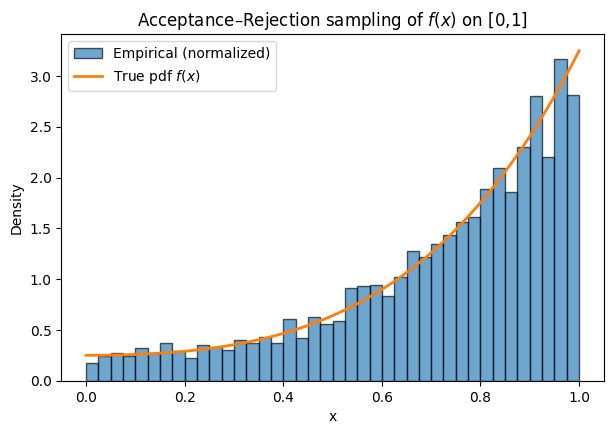

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ---- target pdf on [0,1] ----
def f_target(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1) / 4.0

# ---- acceptance–rejection sampler; also returns total uniforms used ----
def sample_X_AR(n, rng=None):
    """
    Acceptance–Rejection for target f on [0,1] with Unif(0,1) proposal.
    Returns:
        samples : array of length n
        uniforms_used : total number of Unif(0,1) calls (proposal + accept U)
    """
    if rng is None:
        rng = np.random.default_rng()
    M = 13.0 / 4.0

    out = np.empty(n, dtype=float)
    i = 0
    uniforms_used = 0

    while i < n:
        x_star = rng.random()     # proposal ~ Unif(0,1)
        u = rng.random()          # acceptance uniform
        uniforms_used += 2
        if u <= f_target(x_star) / M:
            out[i] = x_star
            i += 1
    return out, uniforms_used

# --- simulate ---
rng = np.random.default_rng(2025)
n = 2500
samples, uniforms_used = sample_X_AR(n, rng=rng)

# --- report efficiency ---
M = 13/4
p_acc = 1/M
print(f"Samples generated: {n}")
print(f"Total Uniform(0,1) draws used: {uniforms_used}")
print(f"Empirical acceptance rate: {n / (uniforms_used/2):.4f} (theoretical {p_acc:.4f})")

# --- histogram + true pdf overlay ---
x_grid = np.linspace(0, 1, 500)
pdf_vals = f_target(x_grid)

plt.figure(figsize=(7,4.5))
plt.hist(samples, bins=40, range=(0,1), density=True,
         edgecolor='black', alpha=0.65, label='Empirical (normalized)')
plt.plot(x_grid, pdf_vals, linewidth=2, label='True pdf $f(x)$')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Acceptance–Rejection sampling of $f(x)$ on [0,1]')
plt.legend()
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal\ N(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a $Laplace$ (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

We want to generate random samples from the **Laplace distribution** with pdf

$$
g(x) = \tfrac{1}{2} e^{-|x|}, \quad x \in \mathbb{R}.
$$


For \(x < 0\):

$$
F(x) = \int_{-\infty}^x \tfrac{1}{2} e^{-|t|} \, dt
= \tfrac{1}{2} e^x.
$$

For $(x \geq 0)$:

$$
F(x) = 1 - \int_x^\infty \tfrac{1}{2} e^{-|t|} \, dt
= 1 - \tfrac{1}{2} e^{-x}.
$$

So the cumulative distribution function is

$$
F(x) =
\begin{cases}
\tfrac{1}{2} e^x, & x < 0, \\
1 - \tfrac{1}{2} e^{-x}, & x \geq 0.
\end{cases}
$$


Let $(U \sim \text{Unif}(0,1))$.  
We solve $(F(x) = U)$ for (X).

- If $(0 < U < \tfrac{1}{2})$:

$$
U = \tfrac{1}{2} e^x \quad \implies \quad x = \ln(2U).
$$

- If \(\tfrac{1}{2} \leq U < 1\):

$$
U = 1 - \tfrac{1}{2} e^{-x} \quad \implies \quad x = -\ln\!\big(2(1-U)\big).
$$



Thus, a sample from the Laplace distribution can be generated as

$$
X =
\begin{cases}
\ln(2U), & U < \tfrac{1}{2}, \\
-\ln\!\big(2(1-U)\big), & U \geq \tfrac{1}{2},
\end{cases}
$$

where $(U \sim \text{Unif}(0,1))$.


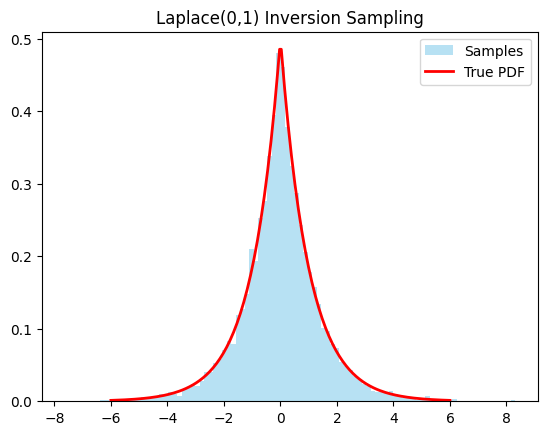

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def rlaplace(n, rng=None):
    """
    Generate n iid Laplace(0, 1) samples with pdf g(x) = 0.5 * exp(-|x|).
    Uses inverse CDF method.
    """
    rng = np.random.default_rng() if rng is None else rng
    U = rng.random(n)
    X = np.where(U < 0.5, np.log(2*U), -np.log(2*(1 - U)))
    return X

# Generate samples
n_samples = 10000
samples = rlaplace(n_samples)

# Plot histogram with pdf overlay
x_vals = np.linspace(-6, 6, 200)
pdf_vals = 0.5 * np.exp(-np.abs(x_vals))

plt.hist(samples, bins=100, density=True, alpha=0.6, color="skyblue", label="Samples")
plt.plot(x_vals, pdf_vals, "r-", lw=2, label="True PDF")
plt.title("Laplace(0,1) Inversion Sampling")
plt.legend()
plt.show()

#first draft helped by chat

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal\ N(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

We want to generate samples from the **standard normal distribution** with pdf

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}, \quad x \in \mathbb{R},
$$

using **acceptance–rejection** with a **Laplace proposal**

$$
g(x) = \tfrac{1}{2} e^{-|x|}.
$$

---

#### Find the smallest \(k\)

We require

$$
k g(x) \geq f(x), \quad \forall x \in \mathbb{R}.
$$

Equivalently,

$$
k \geq \sup_x \frac{f(x)}{g(x)}.
$$

Compute the ratio:

$$
\frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^2/2}}{\tfrac{1}{2} e^{-|x|}}
= \frac{2}{\sqrt{2\pi}} e^{|x| - x^2/2}.
$$

Since the ratio is even in \(x\), consider $(x \geq 0)$. Define

$$
h(x) = x - \frac{x^2}{2}.
$$

The maximum occurs at

$$
h'(x) = 1 - x = 0 \quad \implies \quad x = 1.
$$

Thus,

$$
k^\star = \frac{2}{\sqrt{2\pi}} e^{h(1)}
= \frac{2}{\sqrt{2\pi}} e^{1/2}
= \sqrt{\frac{2e}{\pi}}.
$$

Numerically,

$$
k^\star \approx 1.315.
$$

#### Acceptance probability

The expected acceptance probability is

$$
\mathbb{P}(\text{accept}) = \frac{1}{k^\star}
= \sqrt{\frac{\pi}{2e}}
\approx 0.761.
$$

Hence, the expected number of proposals per accepted sample is

$$
\mathbb{E}[\text{proposals}] = k^\star \approx 1.315.
$$

#### Acceptance–Rejection algorithm

1. Generate a proposal $(Y \sim \text{Laplace}(0,1))$ using the inverse CDF from part (a):

$$
Y =
\begin{cases}
\ln(2U_1), & U_1 < \tfrac{1}{2}, \\
-\ln\!\big(2(1-U_1)\big), & U_1 \geq \tfrac{1}{2},
\end{cases}
\quad U_1 \sim \text{Unif}(0,1).
$$

2. Draw another $(U_2 \sim \text{Unif}(0,1))$.  
Accept \(X = Y\) if

$$
U_2 \leq \frac{f(Y)}{k^\star g(Y)}
= \exp\!\Big( |Y| - \frac{Y^2 + 1}{2} \Big).
$$

3. Otherwise reject and repeat.

This produces exact samples $(X \sim \mathcal \ N(0,1))$.


theoretical k* = 1.315489, theoretical accept = 0.760173
empirical   k   = 1.313950, empirical   accept = 0.761064


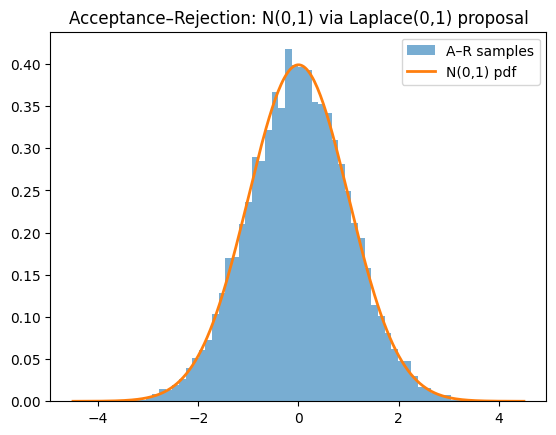

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, e, pi

# --- Laplace(0,1) via inverse CDF (from part a) ---
def rlaplace(n, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    U = rng.random(n)
    return np.where(U < 0.5, np.log(2*U), -np.log(2*(1 - U)))

# --- A–R sampler for N(0,1) with Laplace proposal ---
k_star = sqrt(2*e/pi)                   # optimal envelope constant
accept_prob_theory = 1.0 / k_star       # ~ 0.7606

def rnorm_via_AR_from_laplace(n, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    out = np.empty(n)
    proposals = 0
    i = 0
    while i < n:
        y = rlaplace(1, rng=rng)[0]
        u = rng.random()
        # acceptance test: f(y)/(k g(y)) = exp(|y| - (y^2+1)/2)
        if u <= np.exp(np.abs(y) - 0.5*(y*y + 1.0)):
            out[i] = y
            i += 1
        proposals += 1
    return out, proposals

# --- Demo / sanity check ---
n_samples = 20000
samples, proposals = rnorm_via_AR_from_laplace(n_samples)
emp_accept_rate = n_samples / proposals
emp_k = proposals / n_samples

print(f"theoretical k* = {k_star:.6f}, theoretical accept = {accept_prob_theory:.6f}")
print(f"empirical   k   = {emp_k:.6f}, empirical   accept = {emp_accept_rate:.6f}")

# Quick visual check
x = np.linspace(-4.5, 4.5, 300)
f = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x*x)

plt.hist(samples, bins=60, density=True, alpha=0.6, label="A–R samples")
plt.plot(x, f, lw=2, label="N(0,1) pdf")
plt.title("Acceptance–Rejection: N(0,1) via Laplace(0,1) proposal")
plt.legend()
plt.show()

#first draft helped by chat

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

theoretical accept prob  = 0.760173
theoretical uniforms/obs = 2.630978
empirical  proposals     = 1307
empirical  uniforms used = 2614
empirical  uniforms/obs  = 2.614000


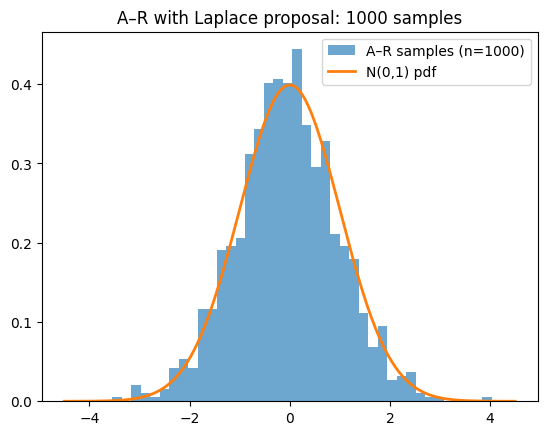


Estimated totals of U[0,1] draws for n=1000:
mean = 2630.53
95% CI = [2626.64, 2634.41]
(theoretical expectation ≈ 2630.98)


In [13]:
# --- Problem (c): Implementation and reporting ---

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, e, pi

# --- constants from part (b) ---
k_star = sqrt(2*e/pi)                     # optimal envelope constant
accept_prob_theory = 1.0 / k_star
expected_uniforms_per_sample = 2.0 * k_star

# --- Laplace(0,1) via inverse CDF: 1 uniform per proposal ---
def rlaplace_1U(n, rng):
    U = rng.random(n)
    return np.where(U < 0.5, np.log(2*U), -np.log(2*(1 - U))), n  # returns samples and #uniforms used

# --- A–R sampler for N(0,1) that counts U[0,1] draws ---
def rnorm_AR_from_laplace(n, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    out = np.empty(n)
    i = 0
    total_uniforms = 0
    proposals = 0
    while i < n:
        # proposal: Laplace via inverse CDF (uses 1 uniform)
        y, u_used = rlaplace_1U(1, rng)
        y = y[0]
        total_uniforms += u_used
        # acceptance test uses 1 more uniform
        u = rng.random()
        total_uniforms += 1
        if u <= np.exp(np.abs(y) - 0.5*(y*y + 1.0)):
            out[i] = y
            i += 1
        proposals += 1
    return out, proposals, total_uniforms

# --- (i) One run for 1000 samples + histogram ---
n = 1000
rng = np.random.default_rng(123)
samples, proposals, total_uniforms = rnorm_AR_from_laplace(n, rng=rng)

print(f"theoretical accept prob  = {accept_prob_theory:.6f}")
print(f"theoretical uniforms/obs = {expected_uniforms_per_sample:.6f}")
print(f"empirical  proposals     = {proposals}")
print(f"empirical  uniforms used = {total_uniforms}")
print(f"empirical  uniforms/obs  = {total_uniforms/n:.6f}")

# histogram with N(0,1) overlay
x = np.linspace(-4.5, 4.5, 300)
f = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x*x)

plt.hist(samples, bins=40, density=True, alpha=0.65, label="A–R samples (n=1000)")
plt.plot(x, f, lw=2, label="N(0,1) pdf")
plt.title("A–R with Laplace proposal: 1000 samples")
plt.legend()
plt.show()

# --- (ii) Repetitions to estimate mean and 95% CI for total uniforms for n=1000 ---
R = 400  # replications; increase for tighter CI if desired
totals = np.empty(R, dtype=float)
rng = np.random.default_rng(999)

for r in range(R):
    _, _, T = rnorm_AR_from_laplace(n, rng=rng)
    totals[r] = T

T_bar = totals.mean()
T_sd  = totals.std(ddof=1)
half_width = 1.96 * T_sd / np.sqrt(R)

print("\nEstimated totals of U[0,1] draws for n=1000:")
print(f"mean = {T_bar:.2f}")
print(f"95% CI = [{T_bar - half_width:.2f}, {T_bar + half_width:.2f}]")
print(f"(theoretical expectation ≈ {n * expected_uniforms_per_sample:.2f})")

#first draft helped by chat

<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

The **standard Cauchy** proposal has pdf
$$
g(x) \;=\; \frac{1}{\pi\,(1+x^2)},\qquad x\in\mathbb{R}.
$$

**CDF and inverse.** Its CDF is
$$
G(x) \;=\; \frac{1}{2} + \frac{1}{\pi}\arctan(x).
$$
If $U\sim\mathrm{Unif}(0,1)$ and $X=G^{-1}(U)$, then
$$
U \;=\; \tfrac{1}{2} + \tfrac{1}{\pi}\arctan(X)
\;\;\Longrightarrow\;\;
\arctan(X) \;=\; \pi\Bigl(U-\tfrac{1}{2}\Bigr)
\;\;\Longrightarrow\;\;
\boxed{\,X \;=\; \tan\!\bigl(\pi(U-\tfrac{1}{2})\bigr)\,}.
$$

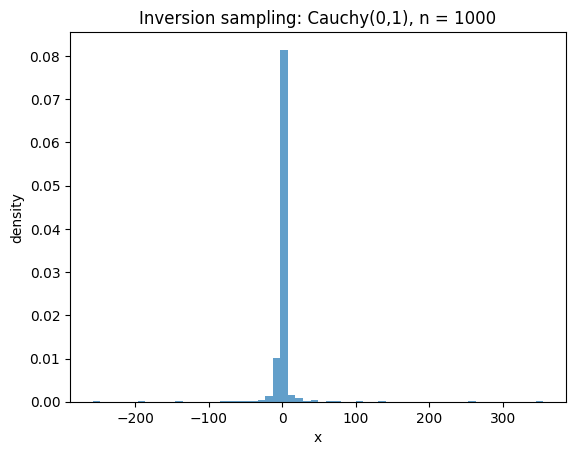

In [14]:
# Cauchy(0,1) inversion sampler and histogram (n = 1000)

import numpy as np
import matplotlib.pyplot as plt

def rcauchy(n, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    U = rng.random(n)                         # U ~ Unif(0,1)
    X = np.tan(np.pi*(U - 0.5))               # inverse-CDF: tan(pi(U-1/2))
    return X

# generate
n = 1000
rng = np.random.default_rng(42)
x = rcauchy(n, rng=rng)

# histogram (Cauchy has heavy tails; use wider range and fewer bins)
plt.hist(x, bins=60, density=True, alpha=0.7)
plt.title("Inversion sampling: Cauchy(0,1), n = 1000")
plt.xlabel("x")
plt.ylabel("density")
plt.show()

# First draft help from chat

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

We want to generate samples from the **standard normal distribution** with pdf

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}, \quad x \in \mathbb{R},
$$

using **acceptance–rejection** with the **Cauchy proposal**

$$
g(x) = \frac{1}{\pi(1+x^2)}.
$$


We require the smallest \(k\) such that

$$
k\,g(x) \ge f(x) \quad \forall x \in \mathbb{R}.
$$

Equivalently,

$$
k \;\ge\; \sup_x \frac{f(x)}{g(x)}
\;=\; \sup_x \left[\frac{1}{\sqrt{2\pi}} e^{-x^2/2}\right] \cdot \pi(1+x^2)
\;=\; \sqrt{\frac{\pi}{2}}\,(1+x^2)\,e^{-x^2/2}.
$$

Let $t = x^2 \ge 0$ and define $r(t) = (1+t)e^{-t/2}$.  
Then

$$
r'(t) = e^{-t/2}\Big(1 - \tfrac{1+t}{2}\Big)
= \tfrac{1}{2} e^{-t/2}(1-t),
$$

so the maximum occurs at \(t=1\) (i.e., \(|x|=1\)).  
Hence

$$
k^\star
= \sqrt{\frac{\pi}{2}}\,(1+1)\,e^{-1/2}
= \sqrt{2\pi}\,e^{-1/2}
\approx 1.519.
$$


The acceptance probability is

$$
\mathbb{P}(\text{accept}) \;=\; \frac{1}{k^\star}
= \frac{e^{1/2}}{\sqrt{2\pi}}
\approx 0.658,
$$

so the expected number of **proposals per accepted sample** is

$$
\mathbb{E}[\text{proposals per accept}] \;=\; k^\star \approx 1.519.
$$

Using the **inversion** sampler for the Cauchy proposal (one $U[0,1]$ to propose and one to accept), the expected number of **uniform draws per accepted sample** is

$$
\mathbb{E}[\text{uniforms per accept}]
= 2\,k^\star
= 2\sqrt{2\pi}\,e^{-1/2}
\approx 3.038,
$$

and for \(1000\) samples the theoretical expectation is

$$
\mathbb{E}[\text{total uniforms for 1000}]
= 1000 \times 2\sqrt{2\pi}\,e^{-1/2}
\approx 3038.
$$


#### Acceptance Test

With $(k=k^\star)$, the accept/reject inequality simplifies to

$$
U \le \frac{f(Y)}{k^\star g(Y)}
= \frac{\sqrt{\pi/2}}{k^\star}\,(1+Y^2)\,e^{-Y^2/2}
= \tfrac{1}{2}\,e^{1/2}\,(1+Y^2)\,e^{-Y^2/2}
= \frac{1+Y^2}{2}\,\exp\!\Big(\frac{1-Y^2}{2}\Big),
$$

which equals \(1\) at \(|Y|=1\) and is \(\le 1\) elsewhere.

#### AR Algorithm with Cauchy Proposal

1. Propose $(Y = \tan\!\big(\pi(U_1-\tfrac{1}{2})\big))$, where $(U_1 \sim \text{Unif}(0,1))$.
2. Draw $(U_2 \sim \text{Unif}(0,1))$.  
   Accept \(X=Y\) if
   $$
   U_2 \le \frac{1+Y^2}{2}\,\exp\!\Big(\frac{1-Y^2}{2}\Big).
   $$
   Otherwise reject and repeat.


theoretical accept prob  = 0.657745
theoretical uniforms/obs = 3.040694
empirical  proposals     = 1515
empirical  uniforms used = 3030
empirical  uniforms/obs  = 3.030000


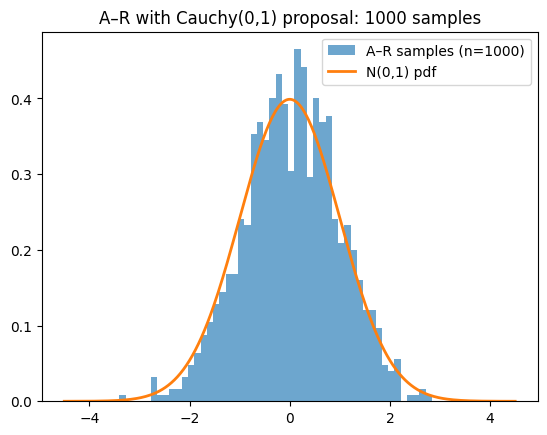


Estimated totals of U[0,1] draws for n=1000:
mean = 3038.98
95% CI = [3033.56, 3044.40]
(theoretical expectation ≈ 3040.69)


In [15]:
# Part (e): A–R for N(0,1) using Cauchy proposal; histogram and 95% CI for U[0,1] usage

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, e, pi

# --- constants ---
k_star = sqrt(2*pi) * e**(-0.5)          # optimal k*
accept_prob_theory = 1.0 / k_star        # ~ 0.658
expected_uniforms_per_sample = 2.0 * k_star

# --- Cauchy(0,1) via inversion: x = tan(pi(U-1/2)); uses 1 uniform per proposal ---
def rcauchy_1U(n, rng):
    U = rng.random(n)
    return np.tan(np.pi*(U - 0.5)), n     # return samples and #uniforms used

# --- A–R sampler that counts U[0,1] draws explicitly ---
def rnorm_AR_from_cauchy(n, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    out = np.empty(n)
    i = 0
    total_uniforms = 0
    proposals = 0
    while i < n:
        y, u_used = rcauchy_1U(1, rng)    # one uniform for proposal
        y = y[0]
        total_uniforms += u_used
        u = rng.random()                  # one uniform for accept/reject
        total_uniforms += 1
        # acceptance test: (1 + y^2)/2 * exp((1 - y^2)/2)
        if u <= 0.5 * (1.0 + y*y) * np.exp(0.5 * (1.0 - y*y)):
            out[i] = y
            i += 1
        proposals += 1
    return out, proposals, total_uniforms

# --- (i) One run for n=1000 + histogram ---
n = 1000
rng = np.random.default_rng(2025)
samples, proposals, total_uniforms = rnorm_AR_from_cauchy(n, rng=rng)

print(f"theoretical accept prob  = {accept_prob_theory:.6f}")
print(f"theoretical uniforms/obs = {expected_uniforms_per_sample:.6f}")
print(f"empirical  proposals     = {proposals}")
print(f"empirical  uniforms used = {total_uniforms}")
print(f"empirical  uniforms/obs  = {total_uniforms/n:.6f}")

# histogram with N(0,1) overlay
x = np.linspace(-4.5, 4.5, 300)
f = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x*x)

plt.hist(samples, bins=50, density=True, alpha=0.65, label="A–R samples (n=1000)")
plt.plot(x, f, lw=2, label="N(0,1) pdf")
plt.title("A–R with Cauchy(0,1) proposal: 1000 samples")
plt.legend()
plt.show()

# --- (ii) Repetitions to estimate mean and 95% CI for total uniforms for n=1000 ---
R = 400
totals = np.empty(R, dtype=float)
rng = np.random.default_rng(777)

for r in range(R):
    _, _, T = rnorm_AR_from_cauchy(n, rng=rng)
    totals[r] = T

T_bar = totals.mean()
T_sd  = totals.std(ddof=1)
half_width = 1.96 * T_sd / np.sqrt(R)

print("\nEstimated totals of U[0,1] draws for n=1000:")
print(f"mean = {T_bar:.2f}")
print(f"95% CI = [{T_bar - half_width:.2f}, {T_bar + half_width:.2f}]")
print(f"(theoretical expectation ≈ {n * expected_uniforms_per_sample:.2f})")


### Citations

Chat GPT 5 was used to generate first draft of code, to transcribe my hand written notes/work to latex code, and for occaisional help with theorhetical ideas and explaining concepts more in-depth.

Filler to have it printed to pdf correctly


filler

filler

filler

filler

filler

filler

filler

filler